# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.369518e+01     1.428152e+01
 * time: 0.002231121063232422
     1     6.313442e+01     9.367694e+00
 * time: 0.006359100341796875
     2     5.812280e+01     1.185893e+01
 * time: 0.015415191650390625
     3     4.246141e+01     9.373423e+00
 * time: 0.02715897560119629
     4     3.443819e+01     9.322882e+00
 * time: 0.08013200759887695
     5     1.453670e+01     3.422571e+00
 * time: 0.09200716018676758
     6     1.040103e+01     2.888578e+00
 * time: 0.10054206848144531
     7     9.109000e+00     1.979617e+00
 * time: 0.10885310173034668
     8     8.974822e+00     6.494764e+00
 * time: 0.11580014228820801
     9     8.198530e+00     2.924701e+00
 * time: 0.12432098388671875
    10     7.147715e+00     2.480871e+00
 * time: 0.13292312622070312
    11     6.626769e+00     2.740595e+00
 * time: 0.18104910850524902
    12     6.256956e+00     1.808273e+00
 * time: 0.19045615196228027
    13     6.038722e+00     2.030402e+00
 * ti

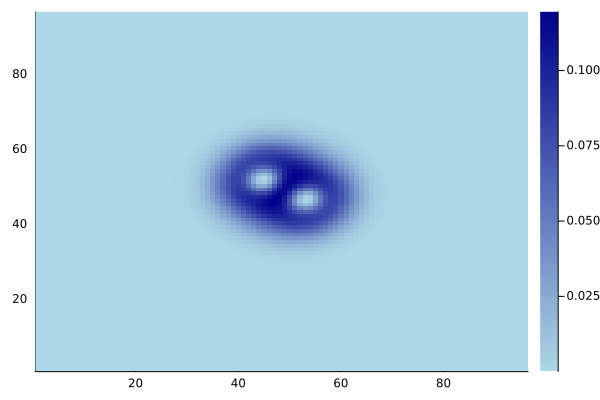

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)